In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


# Data Preparation

In [2]:
# Import dataset
data = pd.read_csv('train (1).csv')
data.head()


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


Data Inspection

In [3]:
data.shape


(69999, 172)

69999 records with 172 columns present in data
<br> Its a big dataset and a high dimensional one



In [4]:
# Datatypes
data.dtypes.value_counts()


float64    135
int64       28
object       9
dtype: int64

The dataset has predominantly float and integer values, with date columns identified as object datatypes, need to convert them if column is useful

In [5]:
# Removing columns based on data understanding
data.info(show_counts=True, verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In [6]:
# Missing Values in each column
null_vals = pd.DataFrame(data.isna().sum(), columns=["Null Values"])
null_vals = null_vals[null_vals["Null Values"] != 0]
print(null_vals)


                      Null Values
loc_og_t2o_mou                702
std_og_t2o_mou                702
loc_ic_t2o_mou                702
last_date_of_month_7          399
last_date_of_month_8          733
...                           ...
night_pck_user_7            52134
night_pck_user_8            51582
fb_user_6                   52431
fb_user_7                   52134
fb_user_8                   51582

[125 rows x 1 columns]


In [7]:
# Some recharge columns are shown as missing values, however they mean, there is no recharge done(null can be filled with 0)
for row in null_vals.iterrows():
    col = row[0]
    if col.find('rech') != -1 and col.find('date') == -1:
        data[col].fillna(0, inplace=True)
        print(f"{col} filled with 0")


total_rech_data_6 filled with 0
total_rech_data_7 filled with 0
total_rech_data_8 filled with 0
max_rech_data_6 filled with 0
max_rech_data_7 filled with 0
max_rech_data_8 filled with 0
count_rech_2g_6 filled with 0
count_rech_2g_7 filled with 0
count_rech_2g_8 filled with 0
count_rech_3g_6 filled with 0
count_rech_3g_7 filled with 0
count_rech_3g_8 filled with 0
av_rech_amt_data_6 filled with 0
av_rech_amt_data_7 filled with 0
av_rech_amt_data_8 filled with 0


Data Cleaning

In [8]:
# Remove id column since its not important for prediction
data.drop("id", inplace=True, axis=1)


In [9]:
# Same values across column
same_val_col = []
for col in data.columns:
    uq = data[col].nunique()
    if uq == 1:
        same_val_col.append(col)
print(f"These columns have same values,hence dropped : {same_val_col}")
# Keeping last date of month for derived feature
same_val_col = list(set(
    same_val_col)-set(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']))
data.drop(same_val_col, inplace=True, axis=1)


These columns have same values,hence dropped : ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [10]:
# Missing value ratio
# Removing columns having more than 70% missing values in entries
perc = data.isna().sum()/len(data)
cols_to_del = [col for col, val in perc.items() if val >= 0.7]
print("Columns having more than 70% missing values are", cols_to_del)


Columns having more than 70% missing values are ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [11]:
# However replacing missing values in the categorical variables as a new category
cat_cols_keep = ['night_pck_user_6', 'night_pck_user_7',
                 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
for col in cat_cols_keep:
    data[col].fillna(-1, inplace=True)


In [12]:
# Deleting the remaining columns with high missing values
cols_to_del = list(set(cols_to_del)-set(cat_cols_keep))
data.drop(cols_to_del, inplace=True, axis=1)


In [13]:
# Splitting data into churn and non churn
data_churn = data[data["churn_probability"] == 1]
data_non_churn = data[data["churn_probability"] == 0]


Percentage Churn : 10 %
Percentage Non Churn : 90 %


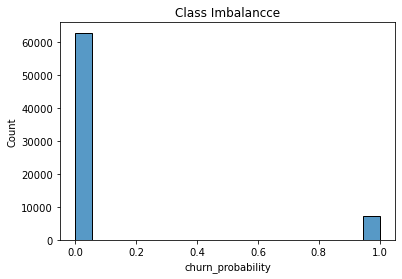

In [14]:
# Understanding class distribution
per_churn = round(len(data_churn)/len(data)*100)
per_non_churn = 100-per_churn
print(f"Percentage Churn : {per_churn} %")
print(f"Percentage Non Churn : {per_non_churn} %")
sns.histplot(data=data, x="churn_probability")
plt.title("Class Imbalancce")
plt.show()


We can see that there is a high class imbalance, almost 90% to 10%, <br> we cannot impute directly, hence imputing values based on target class

### Data Imputation

In [15]:
# Data Imputation
missing = data.isna().sum()
cols_missing_data = [col for col, val in missing.items() if val > 0]
cat_missing_cols = list(
    data[cols_missing_data].select_dtypes(include=['object']).columns)
num_missing_cols = list(data[cols_missing_data].select_dtypes(
    include=['int64', 'float64']).columns)


In [16]:
# Impute using mode for categorical variables, median for numeric variables for churn and non churn data separately
for col in cat_missing_cols:
    mod_churn = data_churn[col].mode()[0]
    data_churn[col].fillna(mod_churn, inplace=True)
    mod_non_churn = data_non_churn[col].mode()[0]
    data_non_churn[col].fillna(mod_non_churn, inplace=True)
for col in num_missing_cols:
    med_churn = data_churn[col].median()
    data_churn[col].fillna(med_churn, inplace=True)
    med_non_churn = data_non_churn[col].median()
    data_non_churn[col].fillna(med_non_churn, inplace=True)


In [17]:
# Merging both dataframes to make the original dataset
data = pd.concat([data_churn, data_non_churn], axis=0)
data = data.sort_index(axis=0)


### Feature Engineering

In [18]:
# Derived Feature : Recharge Days Before Last Date

# Convert date columns into datetime data type
date_cols = []

for col in data.columns:
    if col.find("date") != -1:
        print(col)
        data[col] = pd.to_datetime(data[col], format="%m/%d/%Y")
        date_cols.append(col)
data["recharge_days_before_lastdate_6"] = (
    data["last_date_of_month_6"]-data["date_of_last_rech_6"]).dt.days
data["recharge_days_before_lastdate_7"] = (
    data["last_date_of_month_7"]-data["date_of_last_rech_7"]).dt.days
data["recharge_days_before_lastdate_8"] = (
    data["last_date_of_month_8"]-data["date_of_last_rech_8"]).dt.days
# Dropping Date columns
data.drop(date_cols, inplace=True, axis=1)


last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8


# Exploratory Data Analysis

 For the sake of EDA, we club all the columns of the months, into a single value by taking an average of the values for numeric variables,
 and sum of values for categorical variables


In [19]:
data_eda = data.copy()
c = []
for col in data_eda.columns:
    if col.find("_6") != -1:
        col_name = col.strip("_6")
        col_6 = col
        col_7 = col_name+"_7"
        col_8 = col_name+"_8"
        if col_name in ["fb_user", "night_pck_user", "sachet_2g", "monthly_2g", "sachet_3g", "monthly_3g"]:
            data_eda[col_name] = data_eda[col_6] + \
                data_eda[col_7]+data_eda[col_8]
        else:
            data_eda[col_name] = (
                data_eda[col_6]+data_eda[col_7]+data_eda[col_8])/3
        data_eda.drop([col_6, col_7, col_8], axis=1, inplace=True)
data_eda["vbc_3g"] = (data_eda["jun_vbc_3g"] +
                      data_eda["jul_vbc_3g"]+data_eda["aug_vbc_3g"])/3
data_eda.drop(["jun_vbc_3g", "jul_vbc_3g", "aug_vbc_3g"], axis=1, inplace=True)


In [20]:
data_eda.dtypes


aon                                int64
churn_probability                  int64
arpu                             float64
onnet_mou                        float64
offnet_mou                       float64
roam_ic_mou                      float64
roam_og_mou                      float64
loc_og_t2t_mou                   float64
loc_og_t2m_mou                   float64
loc_og_t2f_mou                   float64
loc_og_t2c_mou                   float64
loc_og_mou                       float64
std_og_t2t_mou                   float64
std_og_t2m_mou                   float64
std_og_t2f_mou                   float64
std_og_mou                       float64
isd_og_mou                       float64
spl_og_mou                       float64
og_others                        float64
total_og_mou                     float64
loc_ic_t2t_mou                   float64
loc_ic_t2m_mou                   float64
loc_ic_t2f_mou                   float64
loc_ic_mou                       float64
std_ic_t2t_mou  

### Correlation Analysis

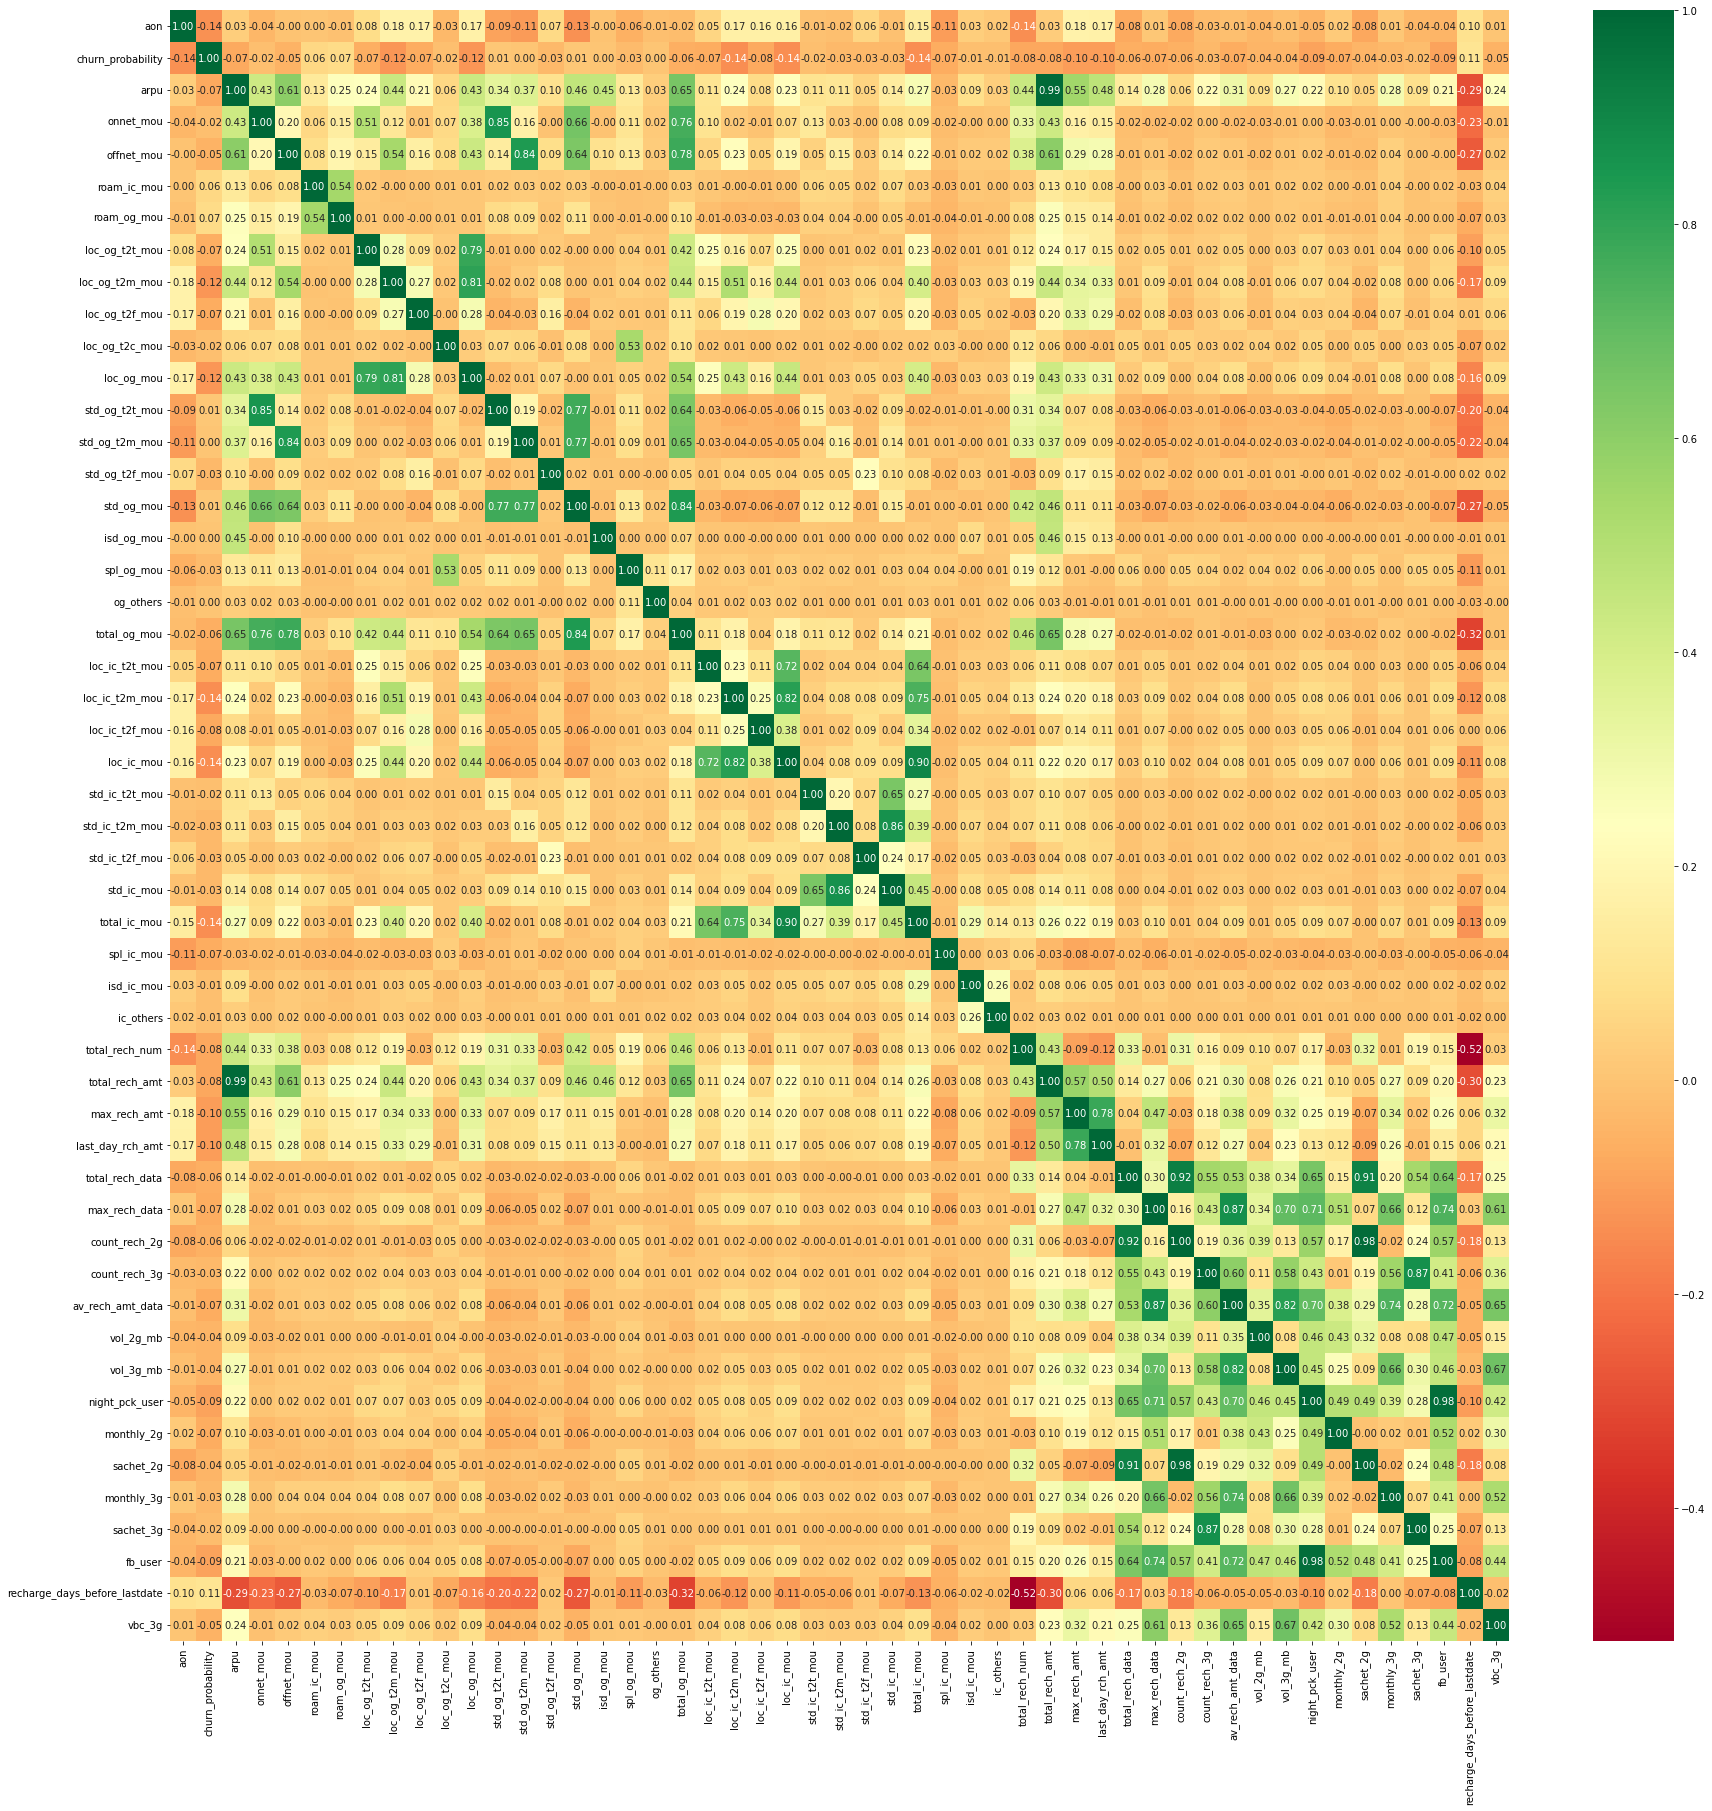

In [21]:
# Checking correlation of numeric variables with target variable(SalePrice)
cols = list(data_eda.columns)
plt.figure(figsize=(30, 30))
corr_mat = data_eda[cols].corr()
sns.heatmap(corr_mat, cmap="RdYlGn", annot=True, fmt='.2f')
plt.show()


Significant Insights from Correlation Map:
1. The total recharge amount of a customer is almost fully correlated with the average revenue per user(arpu), indicating recharge is the only major source of revenue
2. The total recharge for data, is very highly correlated with sachet 2g and then sachet 3g, indicating that introducing more sachet packs for 2g & 3g, can help increasing the recharges(which can be an alternative to one time data packs)
3. Night pack users, highly correlate with facebook user, and have higher average data recharge amount, which indicate that they require more data than calls during nights 

In [22]:
data_eda.columns


Index(['aon', 'churn_probability', 'arpu', 'onnet_mou', 'offnet_mou',
       'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou',
       'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou',
       'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou',
       'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou',
       'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
       'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'total_ic_mou',
       'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num',
       'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'total_rech_data',
       'max_rech_data', 'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data',
       'vol_2g_mb', 'vol_3g_mb', 'night_pck_user', 'monthly_2g', 'sachet_2g',
       'monthly_3g', 'sachet_3g', 'fb_user', 'recharge_days_before_lastdate',
       'vbc_3g'],
      dtype='object')

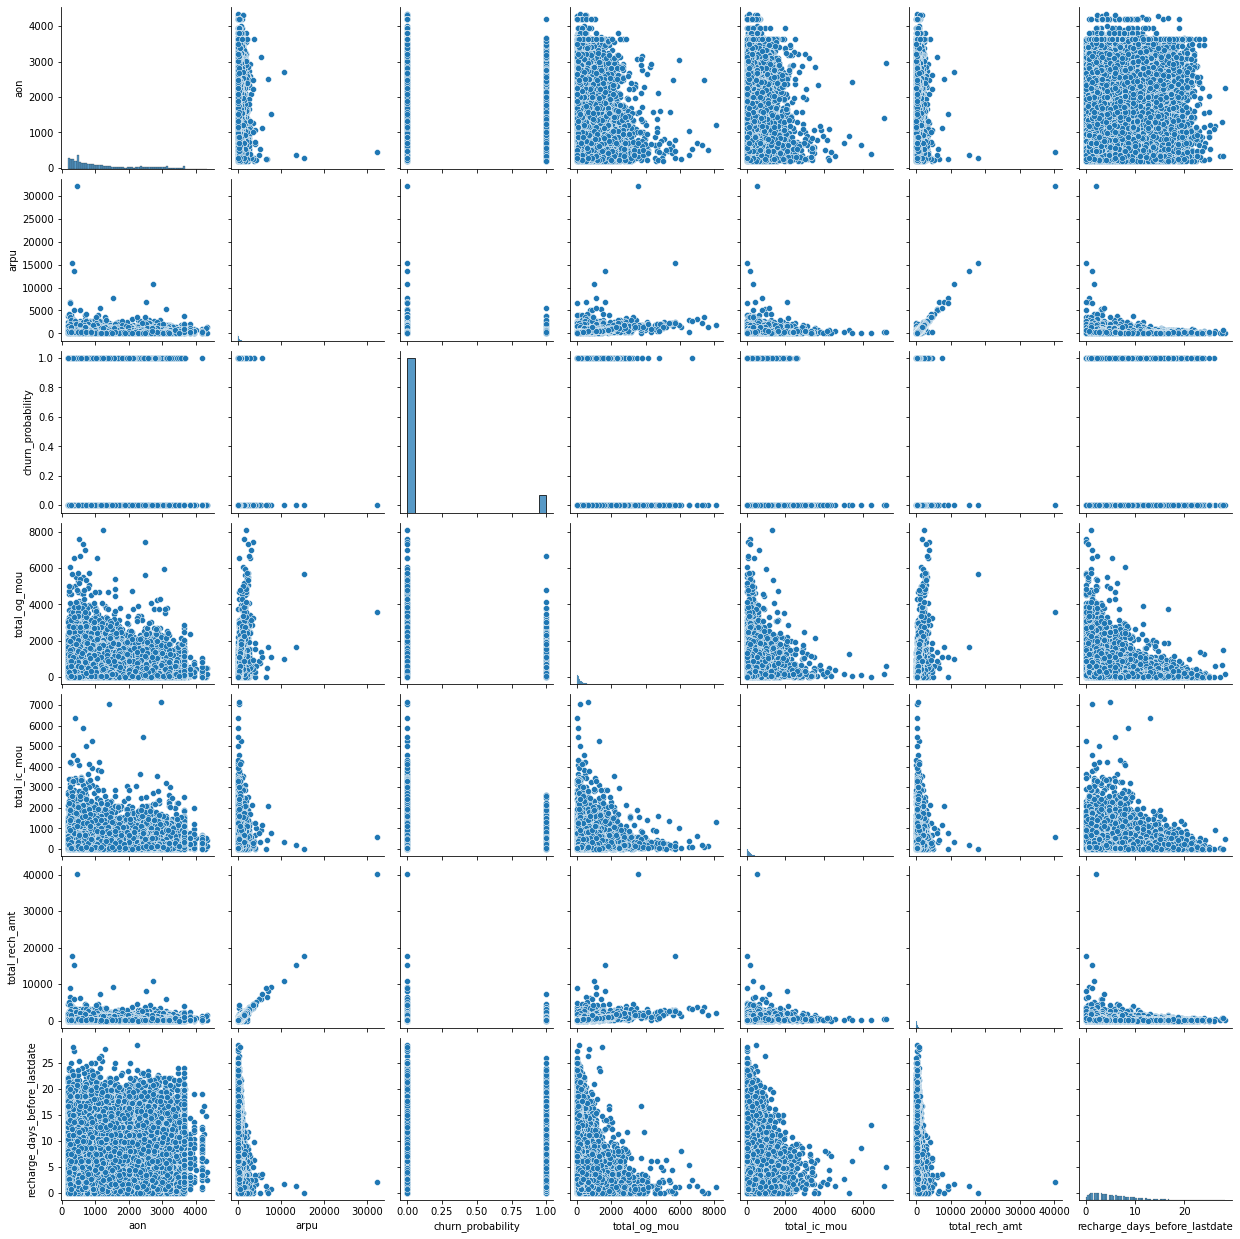

In [23]:
# Pair Plot
top_features = ["aon", "arpu", "churn_probability", "total_og_mou",
                "total_ic_mou", "total_rech_amt", "recharge_days_before_lastdate"]
data_pairplot = data_eda[top_features]
sns.pairplot(data_pairplot)
plt.show()


Observations
- It is observed that people who recharge during the end of the month tend to have more minutes of usage and more recharge amount
- A linear relation observed between avg revenue and recharge amount

In [24]:
# Understanding data distribution
data_eda.describe()


,aon,churn_probability,arpu,onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_t2m_mou,loc_og_t2f_mou,...,vol_2g_mb,vol_3g_mb,night_pck_user,monthly_2g,sachet_2g,monthly_3g,sachet_3g,fb_user,recharge_days_before_lastdate,vbc_3g
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,1220.639709,0.101887,280.059701,128.648999,191.905787,7.598627,10.798516,44.513556,88.698824,3.565051,...,51.047211,128.864289,-2.212689,0.243618,1.279761,0.235503,0.242275,-1.534350,5.546136,64.707056
std,952.426321,0.302502,310.243414,270.674536,280.675480,43.754443,51.892656,137.953889,141.051486,11.911969,...,180.760948,497.042472,1.167918,0.740171,4.205364,0.958917,1.615423,2.212997,4.105540,231.631144
min,180.000000,0.000000,13.426667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000
25%,468.000000,0.000000,105.545833,12.461667,45.586667,0.000000,0.000000,3.790000,15.080000,0.000000,...,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,2.333333,0.000000
50%,868.000000,0.000000,199.662667,37.893333,98.386667,0.000000,0.000000,12.993333,42.093333,0.253333,...,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,4.666667,0.000000
75%,1813.000000,0.000000,356.245000,120.018333,224.125000,1.086667,1.976667,38.823333,104.193333,2.440000,...,9.013333,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,8.000000,0.000000
max,4337.000000,1.000000,32140.182000,7104.600000,7072.333333,3238.733333,3298.940000,6773.026667,4420.553333,640.440000,...,8044.606667,34457.250000,3.000000,11.000000,96.000000,34.000000,83.000000,3.000000,28.333333,7713.046667


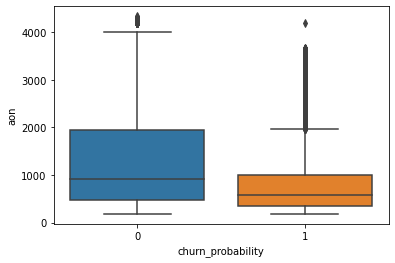

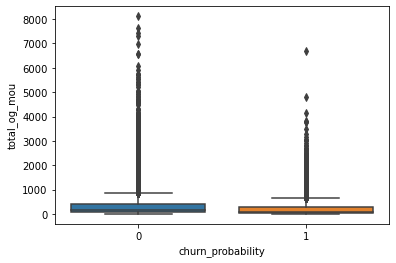

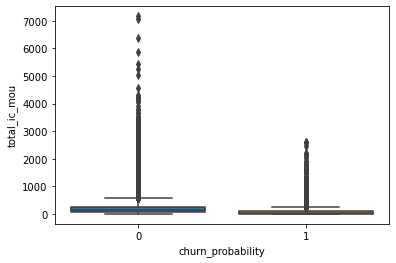

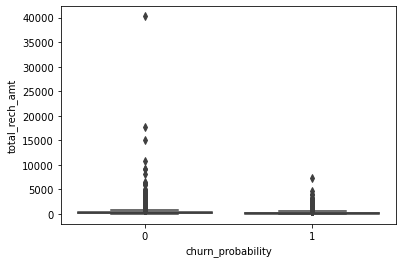

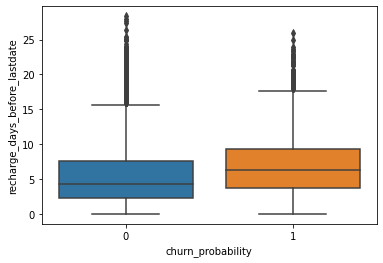

In [25]:
for col in ["aon", "total_og_mou", "total_ic_mou", "total_rech_amt", "recharge_days_before_lastdate"]:
    sns.boxplot(data=data_eda, y=col, x="churn_probability")
    plt.show()


Observations
- Most of the users are on the network from 470 to 1870 days 
- Most of the incoming & outgoing calls minutes of usage is 50 to 250 & 50 to 400 minutes respectively
- Most of the users recharge 2 to 8 days before last date of the month

In [26]:
data_eda['churn_probability'] = data_eda['churn_probability'].astype('string')
data_eda["churn_probability_str"] = data_eda["churn_probability"].apply(
    lambda x: x.replace("0", "Non-Churn").replace("1", "Churn"))


In [27]:
# Understanding remaining columns
cols1 = list(data_eda.columns)
cat_cols = ["churn_probability", "churn_probability_str", "night_pck_user",
            "sachet_2g", "fb_user", "sachet_3g", "monthly_2g", "monthly_3g"]
eda_cols = list(set(cols1)-set(cat_cols))
print(eda_cols)


['av_rech_amt_data', 'loc_og_t2f_mou', 'last_day_rch_amt', 'total_rech_data', 'onnet_mou', 'spl_og_mou', 'aon', 'isd_ic_mou', 'vol_2g_mb', 'std_ic_mou', 'total_rech_amt', 'roam_ic_mou', 'isd_og_mou', 'loc_ic_mou', 'roam_og_mou', 'std_og_t2f_mou', 'vol_3g_mb', 'vbc_3g', 'total_ic_mou', 'spl_ic_mou', 'max_rech_amt', 'loc_ic_t2f_mou', 'loc_og_t2t_mou', 'std_ic_t2f_mou', 'loc_og_mou', 'loc_ic_t2m_mou', 'count_rech_2g', 'offnet_mou', 'total_rech_num', 'loc_ic_t2t_mou', 'std_og_t2m_mou', 'total_og_mou', 'recharge_days_before_lastdate', 'max_rech_data', 'loc_og_t2m_mou', 'count_rech_3g', 'ic_others', 'std_ic_t2t_mou', 'arpu', 'std_og_t2t_mou', 'std_og_mou', 'og_others', 'loc_og_t2c_mou', 'std_ic_t2m_mou']


In [28]:
# Understanding the behaviour of churn and non-churn customers over features
tickers = ["arpu", "roam_og_mou", "monthly_2g", "monthly_3g", "total_rech_data", "aon", "total_og_mou",
           "total_ic_mou", "vol_3g_mb", "vol_2g_mb", "recharge_days_before_lastdate", "last_day_rch_amt"]


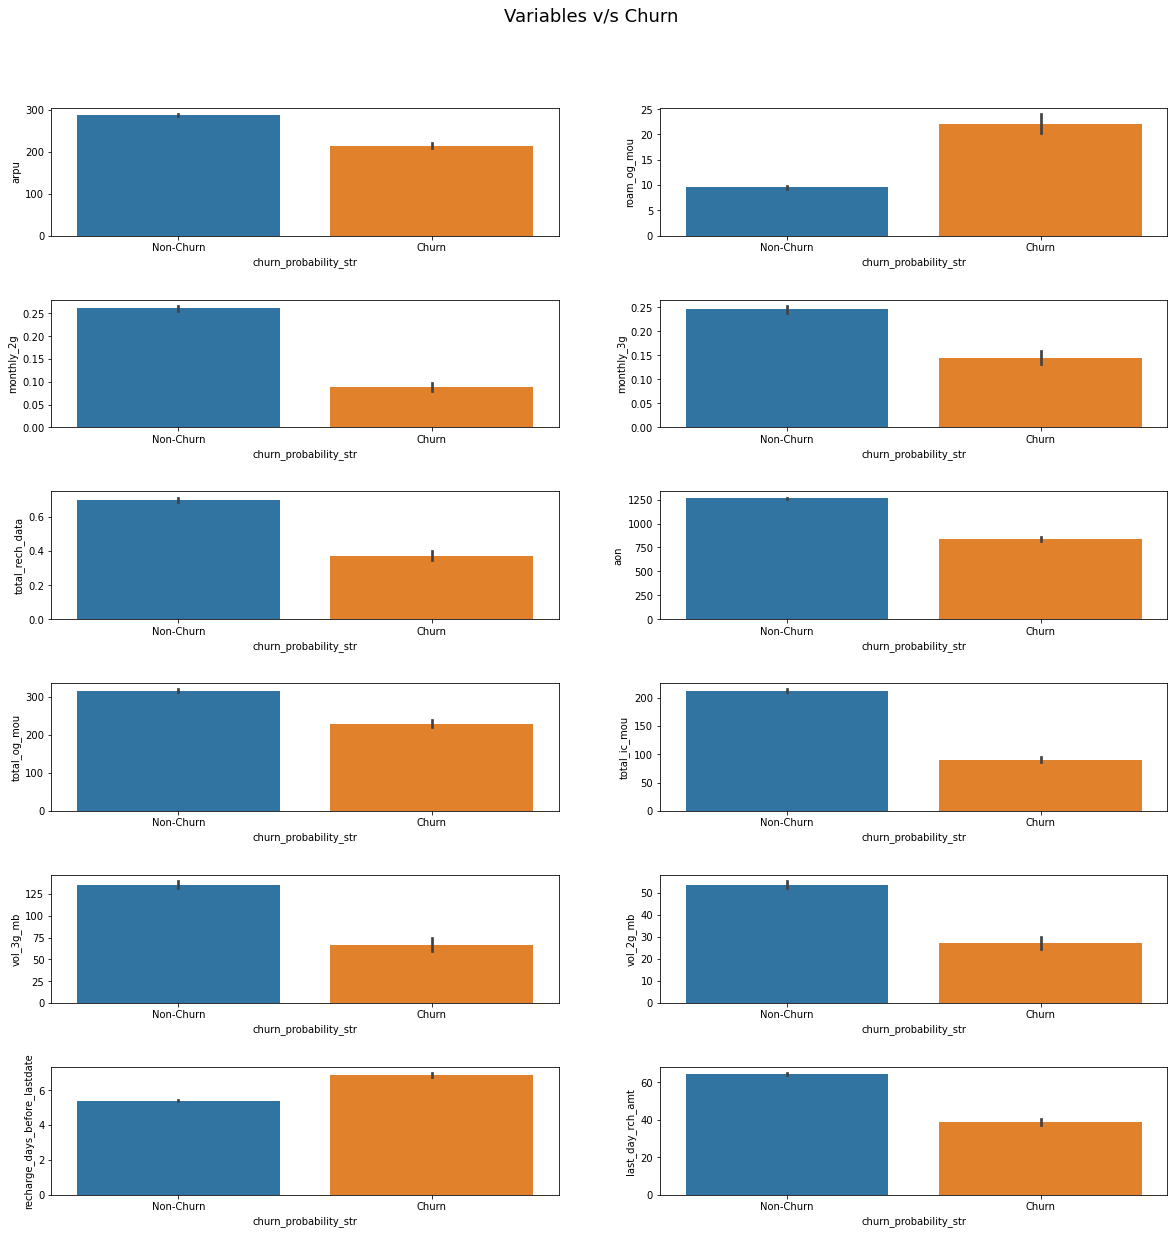

In [29]:
# loop through the length of tickers and keep track of index
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Variables v/s Churn", fontsize=18, y=0.95)

for n, ticker in enumerate(tickers):
    # add a new subplot iteratively
    ax = plt.subplot(6, 2, n + 1)

    # filter df and plot ticker on the new subplot axis
    sns.barplot(data=data_eda, y=ticker, x="churn_probability_str")
    ax.set_ylabel(ticker)
plt.show()

# sns.barplot(data=data_eda,y="arpu",x="churn_probability_str")
# plt.show()


Observations
- It is observed that churned customers on average have lower aon that means, if you are able to retain the customer for longer time, probability of churning is less 
- The churned customers have lower usage of 2g and 3g data and also lower total recharge on data,hence giving attracting offers on data can help them increase data usage and not churn
- Interestingly, customers who have churned tend to recharge more earlier than non churned customers but their recharge amount on last day is lesser than non-churned customers
- Roaming usage for churned customers are higher as compared to non-churned customers, need to focus on roaming packs more to understand the needs for roaming

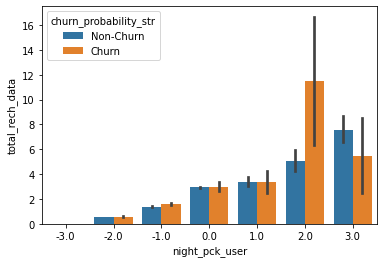

In [30]:
# Data v/s night pack
sns.barplot(data=data_eda, x="night_pck_user",
            y="total_rech_data", hue="churn_probability_str")
plt.show()


- Data shows users with night packs recharge more data (- in night pack means data is not available, can't make analysis for those data points),
- Interestingly night pack users who churn have more total recharge of data as compared to non-churn night pack users - need to introduce plan more effective plan for night pack users

### According to the data analysis, the potentially useful variables for predicting churn can be : 
- Aon : Age on network  number of days the customer is using the operator T network
- arpu :Average revenue per user
- total_rech_data : Total Recharge for mobile data, includes 2g & 3g as well
- Customer Recharge Number of days before the last date of month
- outgoing minutes of usage(Roaming,Outgoing and Incoming)

# Model Building

In [31]:
# Using the cleaned data for model building
data.head()


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,recharge_days_before_lastdate_6,recharge_days_before_lastdate_7,recharge_days_before_lastdate_8
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,-1.0,-1.0,1958,0.0,0.0,0.0,0,8,21,7
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,1.0,-1.0,710,0.0,0.0,0.0,0,18,21,5
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,-1.0,-1.0,882,0.0,0.0,0.0,0,19,9,7
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,-1.0,-1.0,982,0.0,0.0,0.0,0,15,10,6
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,1.0,1.0,647,0.0,0.0,0.0,0,5,5,1


In [32]:
#X_train & y_train
y_train_all = data[["churn_probability"]]
X_train_all = data.drop("churn_probability", axis=1)


In [33]:
#Test-Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=42, stratify=y_train_all)

In [34]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = X_train.columns
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)

### 1. Baseline Model : Logistic Regression

In [35]:
# Feature Selection Using RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression(random_state=42)

rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [36]:
col_rfe = list(X_train.columns[rfe.support_])
print("The top 15 features from RFE are :", col_rfe)

The top 15 features from RFE are : ['onnet_mou_6', 'offnet_mou_6', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8']


In [37]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(X_tr, y_tr):
    features = list(X_tr.columns)
    # VIF
    vif = pd.DataFrame()
    features = X_tr[features]
    vif['Features'] = features.columns
    vif['VIF'] = [variance_inflation_factor(
        features.values, i) for i in range(features.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

vif(X_train[col_rfe], y_train)


,Features,VIF
8,loc_ic_mou_8,9.89
9,total_ic_mou_8,7.29
3,loc_og_t2m_mou_8,4.50
6,loc_ic_t2m_mou_8,4.49
4,loc_og_mou_8,4.47
5,total_og_mou_8,3.33
12,max_rech_amt_8,3.28
13,last_day_rch_amt_8,2.69
11,total_rech_num_8,2.59
1,offnet_mou_6,1.81


In [38]:
# Since multicollinearity observed : Removing loc_ic_mou_8 and training logistic regression model, hence multicollinearity removed
col_rfe.remove("loc_ic_mou_8")
print(vif(X_train[col_rfe], y_train))
X_train_log = X_train[col_rfe]
logreg_fm = LogisticRegression(random_state=42)
logreg_fm.fit(X_train_log, y_train)
print("Logistic regression model fitted")

              Features   VIF
3     loc_og_t2m_mou_8  4.48
4         loc_og_mou_8  4.37
8       total_ic_mou_8  3.43
6     loc_ic_t2m_mou_8  3.42
5       total_og_mou_8  3.30
11      max_rech_amt_8  3.28
12  last_day_rch_amt_8  2.69
10    total_rech_num_8  2.59
1         offnet_mou_6  1.81
0          onnet_mou_6  1.57
13   total_rech_data_8  1.35
7     loc_ic_t2f_mou_8  1.22
2        roam_og_mou_8  1.08
9         spl_ic_mou_8  1.08
Logistic regression model fitted


In [39]:
acc_train_log = round(logreg_fm.score(X_train_log, y_train), 2)
print("The train accuracy for baseline logistic regression model is :", acc_train_log)

The train accuracy for baseline logistic regression model is : 0.9


In [40]:
#Important Predictors of churn
coeff_log_fm_all=list(logreg_fm.coef_)
coeff_df=pd.DataFrame(coeff_log_fm_all).T
feature_names=pd.DataFrame(col_rfe)
interpret_df=pd.concat([feature_names,coeff_df],axis=1)
interpret_df.columns=["Feature","Coefficient"]
interpret_df.sort_values(by="Coefficient",inplace=True)
print(interpret_df)

               Feature  Coefficient
8       total_ic_mou_8   -17.111420
6     loc_ic_t2m_mou_8   -16.560112
10    total_rech_num_8   -13.442679
3     loc_og_t2m_mou_8   -13.053503
12  last_day_rch_amt_8   -11.020992
11      max_rech_amt_8    -9.985265
4         loc_og_mou_8    -9.154857
5       total_og_mou_8    -8.375517
9         spl_ic_mou_8    -7.796402
13   total_rech_data_8    -7.738405
7     loc_ic_t2f_mou_8    -7.653742
0          onnet_mou_6     5.876229
1         offnet_mou_6     7.239904
2        roam_og_mou_8     7.702931


As per logistic regression coefficients, the most import features which are important predictors of churn are : 
- Usage : total incoming minutes of usage,local incoming & outgoing to/from other operator minutes of usage & roaming outgoing usage
- Recharge : total recharge number,last day recharge amount & maxiumum recharge amount
- Revenue : Average revenue per user

Test Metrics

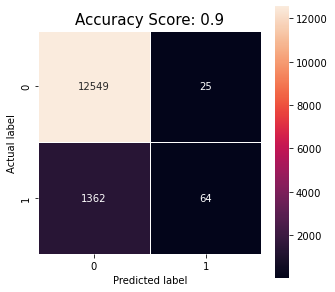

In [41]:
# Confusion Matrix on Test Data
from sklearn import metrics
X_test_log = X_test[col_rfe]
y_test_pred_log = logreg_fm.predict(X_test_log)
cm = metrics.confusion_matrix(y_test, y_test_pred_log)
test_acc_log=round(metrics.accuracy_score(y_test, y_test_pred_log),2)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(test_acc_log)
plt.title(all_sample_title, size=15)
plt.show()

In [42]:
#Other Test Metrics
from sklearn.metrics import recall_score,precision_score,f1_score
print("Precision Score :",round(precision_score(y_test, y_test_pred_log),2))
print("Recall Score :",round(recall_score(y_test, y_test_pred_log),2))
print("F1 Score :",round(f1_score(y_test, y_test_pred_log),2))

Precision Score : 0.72
Recall Score : 0.04
F1 Score : 0.08


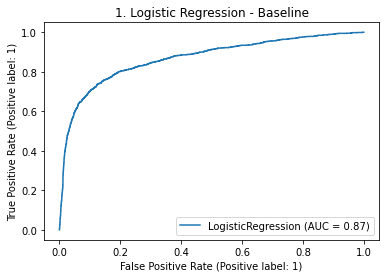

In [43]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logreg_fm,X_test_log,y_test,drop_intermediate=False)
plt.title("1. Logistic Regression - Baseline")
plt.show()

### 2. Baseline Model with Class Weights included - Logistic Regression

Since there is high class imbalance observed, to deal with it we are using class_weights method, which calculates the weights and penalizes majority class and gives importance to minority class <br>
It is calculated as follows :<br>
- wj=n_samples / (n_classes * n_samplesj)

Here,

- wj is the weight for each class(j signifies the class)
- n_samplesis the total number of samples or rows in the dataset
- n_classesis the total number of unique classes in the target
- n_samplesjis the total number of rows of the respective class

In [44]:
# Using columns from RFE performed on the base model, and training logistic regression with balanced class weights
X_train_log = X_train[col_rfe]
logreg_fm2 = LogisticRegression(random_state=42,class_weight='balanced')
logreg_fm2.fit(X_train_log, y_train)
print("Logistic regression model 2 fitted")

Logistic regression model 2 fitted


In [45]:
acc_train_logm2 = round(logreg_fm2.score(X_train_log, y_train), 2)
print("The train accuracy for baseline logistic regression model is :", acc_train_logm2)

The train accuracy for baseline logistic regression model is : 0.76


Test Metrics

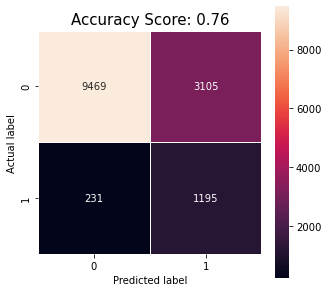

In [46]:
# Confusion Matrix on Test Data
from sklearn import metrics
X_test_log = X_test[col_rfe]
y_test_pred_logm2 = logreg_fm2.predict(X_test_log)
cm = metrics.confusion_matrix(y_test, y_test_pred_logm2)
test_acc_logm2=round(metrics.accuracy_score(y_test, y_test_pred_logm2),2)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(test_acc_logm2)
plt.title(all_sample_title, size=15)
plt.show()


In [47]:
#Other Test Metrics
print("Precision Score :",round(precision_score(y_test, y_test_pred_logm2),2))
print("Recall Score :",round(recall_score(y_test, y_test_pred_logm2),2))
print("F1 Score :",round(f1_score(y_test, y_test_pred_logm2),2))

Precision Score : 0.28
Recall Score : 0.84
F1 Score : 0.42


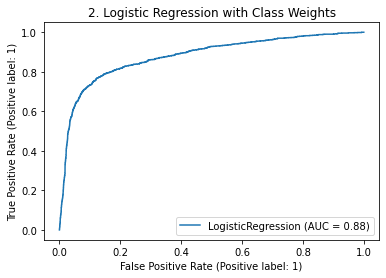

In [48]:
#ROC Curve
plot_roc_curve(logreg_fm2,X_test_log,y_test)
plt.title("2. Logistic Regression with Class Weights")
plt.show()

Observations : 
- The class balance penalty plays a major role,using class_weights have reduced the total accuracy but it has increased the AUC score(very slightly) and F-1 score, and also increased the recall and reduced the precision 
- Its important to try a different model since logistic regression have some limitations which can be overcome

In [49]:
#Dimensional of Training Data
X_train.shape

(55999, 148)

#### - Dimensionality Reduction : <br>
Since we have a high dimensional data and we have already interpreted the model and the important predictors of churn and now interpretation is not a requirement. We can use dimensionality reduction technique PCA to reduce the dimensionality of the features

In [50]:
#PCA - To explain 95% of the total variability
from sklearn.decomposition import PCA,IncrementalPCA
pca = PCA(0.95,random_state=42)
X_pca_tranform = pca.fit_transform(X_train)
X_pca_train = pd.DataFrame(X_pca_tranform)

In [51]:
#15 components are selected which explains around 95% variability in the data
X_pca_train.shape

(55999, 15)

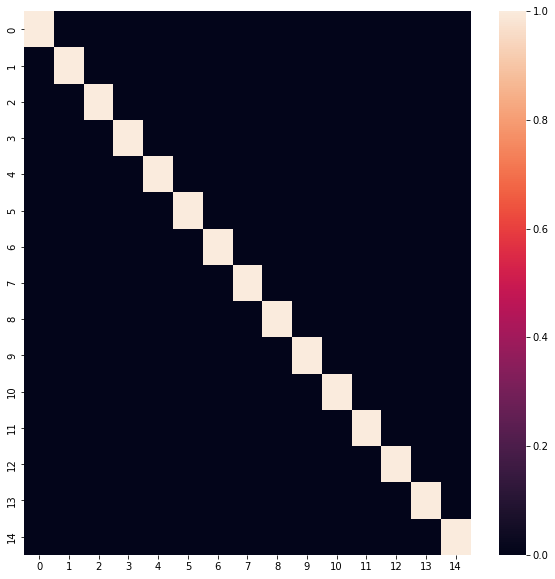

In [52]:
#Uncorrelated components - No multicollinearity observed in train data
corrmat = np.corrcoef(X_pca_train.transpose())
plt.figure(figsize=[10,10])
sns.heatmap(corrmat)
plt.show()

In [53]:
#Test Data - PCA applied
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(14000, 15)

### 3. Random Forests Model

Hyperparameter Tuning

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True,random_state=42, n_jobs=7,oob_score=True) 
params = {
    'max_depth': [2,5,20],
    'min_samples_leaf': [5,10,50],
    'n_estimators': [10,50,100],
    'class_weight':['balanced','balanced_subsample']
}

In [55]:
#Grid Search
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_pca_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_jobs=7, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [2, 5, 20],
                         'min_samples_leaf': [5, 10, 50],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=1)

In [56]:
# #Random Search
# from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=rf,
#                            param_distributions=params,
#                            cv = 4,
#                            n_jobs=-1, verbose=1, scoring="accuracy")
# random_search.fit(X_pca_train, y_train)

In [57]:
#Train accuracy
train_acc_rf=grid_search.best_score_
print("Train accuracy is",round(train_acc_rf,2))

Train accuracy is 0.9


In [58]:
#Looking at random search results
df_rf_results = pd.DataFrame(grid_search.cv_results_)
df_rf_results.sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
20,13.616440,0.219921,1.236019,0.047472,balanced,20,5,100,"{'class_weight': 'balanced', 'max_depth': 20, ...",0.898913,0.897246,0.898693,0.898284,0.000739,1
47,14.315357,0.295788,1.476620,0.325620,balanced_subsample,20,5,100,"{'class_weight': 'balanced_subsample', 'max_de...",0.899073,0.897300,0.897621,0.897998,0.000771,2
46,7.146815,0.290091,1.751456,0.301116,balanced_subsample,20,5,50,"{'class_weight': 'balanced_subsample', 'max_de...",0.899020,0.895800,0.896389,0.897070,0.001400,3
19,6.402620,0.398301,1.723679,0.151196,balanced,20,5,50,"{'class_weight': 'balanced', 'max_depth': 20, ...",0.898538,0.895318,0.896711,0.896855,0.001318,4
45,2.535579,0.126067,1.108459,0.154770,balanced_subsample,20,5,10,"{'class_weight': 'balanced_subsample', 'max_de...",0.886913,0.885728,0.888996,0.887212,0.001351,5


In [59]:
#Best Model
rf_best = grid_search.best_estimator_

In [60]:
#Out of the box Score
oob_score=rf_best.oob_score_
print("The OOB score is",round(oob_score,2))

The OOB score is 0.9


Test Metrics

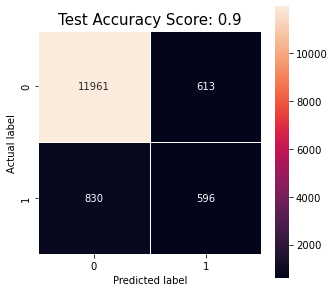

In [61]:
# Confusion Matrix on Test Data
from sklearn import metrics
y_test_pred_rf = rf_best.predict(X_test_pca)
cm_rf = metrics.confusion_matrix(y_test, y_test_pred_rf)
test_acc_rf=round(metrics.accuracy_score(y_test, y_test_pred_rf),2)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", linewidths=.5, square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test Accuracy Score: {0}'.format(test_acc_rf)
plt.title(all_sample_title, size=15)
plt.show()

In [62]:
#Other Test Metrics
print("Precision Score :",round(precision_score(y_test, y_test_pred_rf),2))
print("Recall Score :",round(recall_score(y_test, y_test_pred_rf),2))
print("F1 Score :",round(f1_score(y_test, y_test_pred_rf),2))

Precision Score : 0.49
Recall Score : 0.42
F1 Score : 0.45


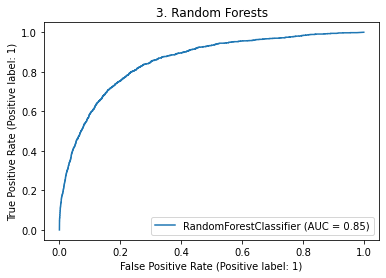

In [63]:
#ROC Curve
plot_roc_curve(rf_best,X_test_pca,y_test)
plt.title("3. Random Forests")
plt.show()

Observations
- Even though the AUC is decreasing slightly, we can see there is a better tradeoff between precision and recall and the f1- score increase in the random forest

### 4. XGBOOST Model

In [64]:
import xgboost as xgb  # Load this xgboost
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

In [65]:
# Fit the model to our train and target
# xgb_cfl.fit(X_pca_train, y_train)
# Get our predictions
# y_xbg_pred_train = xgb_cfl.predict(X_pca_train)

In [66]:
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12],
        'scale_pos_weight':[1,3,5,7,9]
        }

param_comb = 10

random_search_xbg = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=3, verbose=3, random_state=42)

In [67]:
random_search_xbg.fit(X_pca_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [3, 4, 5, 10, 12],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 200, 500, 750],
                                        'scale_pos_weight': [1, 3, 5, 7, 9],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=3)

In [70]:
xbg_best=random_search_xbg.best_estimator_
print("The best parameters are for the boosting model :",random_search_xbg.best_params_)

The best parameters are for the boosting model : {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 750, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 5, 'colsample_bytree': 0.8}


In [71]:
#Train accuracy
from sklearn.metrics import accuracy_score
y_xbg_pred_train = xbg_best.predict(X_pca_train)
xbg_train_acc=accuracy_score(y_train, y_xbg_pred_train)
print("The train accuracy is : ",round(xbg_train_acc,2))

The train accuracy is :  0.93


In [72]:
crossval_acc=random_search_xbg.best_score_
print("The cross-validated accuracy is : ",round(crossval_acc,2))

The cross-validated accuracy is :  0.91


Test Metrics

In [ ]:
# Import Test data
test_data = pd.read_csv("test (1).csv")


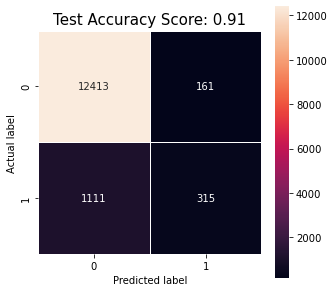

In [74]:
# Confusion Matrix on Test Data
from sklearn import metrics
y_test_pred_xbg = xbg_best.predict(X_test_pca)
cm_xbg = metrics.confusion_matrix(y_test, y_test_pred_xbg)
test_acc_xbg=round(metrics.accuracy_score(y_test, y_test_pred_xbg),2)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_xbg, annot=True, fmt="d", linewidths=.5, square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test Accuracy Score: {0}'.format(test_acc_xbg)
plt.title(all_sample_title, size=15)
plt.show()

In [75]:
#Other Test Metrics
print("Precision Score :",round(precision_score(y_test, y_test_pred_xbg),2))
print("Recall Score :",round(recall_score(y_test, y_test_pred_xbg),2))
print("F1 Score :",round(f1_score(y_test, y_test_pred_xbg),2))

Precision Score : 0.66
Recall Score : 0.22
F1 Score : 0.33


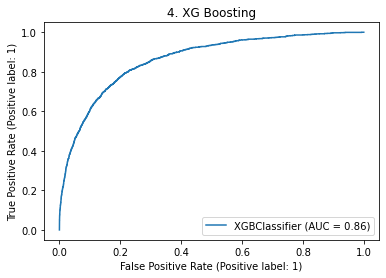

In [76]:
plot_roc_curve(xbg_best,X_test_pca,y_test,drop_intermediate=True)
plt.title("4. XG Boosting")
plt.show()

### Test Data Evaluation

In [78]:
# Import Test data
test_data = pd.read_csv("test (1).csv")

In [79]:
# However replacing missing values in the categorical variables as a new category
cat_cols_keep = ['night_pck_user_6', 'night_pck_user_7',
                 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
for col in cat_cols_keep:
    test_data[col].fillna(-1, inplace=True)


In [80]:
# Missing Values in each column - Test
null_vals_test = pd.DataFrame(test_data.isna().sum(), columns=["Null Values"])
null_vals_test = null_vals_test[null_vals_test["Null Values"] != 0]
# Some recharge columns are shown as missing values, however they mean, there is no recharge done(null can be filled with 0)
for row in null_vals_test.iterrows():
    col = row[0]
    if col.find('rech') != -1 and col.find('date') == -1:
        test_data[col].fillna(0, inplace=True)
        print(f"{col} filled with 0")


total_rech_data_6 filled with 0
total_rech_data_7 filled with 0
total_rech_data_8 filled with 0
max_rech_data_6 filled with 0
max_rech_data_7 filled with 0
max_rech_data_8 filled with 0
count_rech_2g_6 filled with 0
count_rech_2g_7 filled with 0
count_rech_2g_8 filled with 0
count_rech_3g_6 filled with 0
count_rech_3g_7 filled with 0
count_rech_3g_8 filled with 0
av_rech_amt_data_6 filled with 0
av_rech_amt_data_7 filled with 0
av_rech_amt_data_8 filled with 0


In [81]:
# Data Imputation - Test Data
missing_test = test_data.isna().sum()
cols_missing_data_test = [col for col, val in missing_test.items() if val > 0]
cat_missing_cols_test = list(
    test_data[cols_missing_data_test].select_dtypes(include=['object']).columns)
num_missing_cols_test = list(test_data[cols_missing_data_test].select_dtypes(
    include=['int64', 'float64']).columns)
# Impute using mode for categorical variables, median for numeric variables
for col in cat_missing_cols_test:
    mod_data = test_data[col].mode()[0]
    test_data[col].fillna(mod_data, inplace=True)
for col in num_missing_cols_test:
    med_data = test_data[col].median()
    test_data[col].fillna(med_data, inplace=True)


In [82]:
# Derived Feature : Deriving for Test Set also
for col in date_cols:
    test_data[col] = pd.to_datetime(test_data[col], format="%m/%d/%Y")
# Convert date columns into datetime data type
test_data["recharge_days_before_lastdate_6"] = (
    test_data["last_date_of_month_6"]-test_data["date_of_last_rech_6"]).dt.days
test_data["recharge_days_before_lastdate_7"] = (
    test_data["last_date_of_month_7"]-test_data["date_of_last_rech_7"]).dt.days
test_data["recharge_days_before_lastdate_8"] = (
    test_data["last_date_of_month_8"]-test_data["date_of_last_rech_8"]).dt.days
# Dropping Date columns
test_data.drop(date_cols, inplace=True, axis=1)


In [83]:
test_data[cols].head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,recharge_days_before_lastdate_6,recharge_days_before_lastdate_7,recharge_days_before_lastdate_8
0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,...,-1.0,-1.0,-1.0,1692,0.00,0.00,0.00,9,5,7
1,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,...,-1.0,-1.0,-1.0,2533,0.00,0.00,0.00,11,15,7
2,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,...,-1.0,-1.0,-1.0,277,525.61,758.41,241.84,1,4,3
3,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,...,-1.0,-1.0,-1.0,1244,0.00,0.00,0.00,5,1,7
4,306.854,406.289,413.329,450.93,609.03,700.68,60.94,23.84,74.16,0.00,...,-1.0,-1.0,-1.0,462,0.00,0.00,0.00,1,2,1


In [84]:
# # Prediction - Test Data - Logistic Regression
# model=logreg_fm2
# X_test_all = test_data
# X_test_fit_all = X_test_all[cols]
# X_test_fit_all = pd.DataFrame(scaler.transform(X_test_fit_all), columns=cols)
# X_test_log_all = X_test_fit_all[col_rfe]
# pred_test_all = model.predict(X_test_log_all)


In [85]:
# # Prepare Solution file - Test Data - Logistic Regression
# prediction_test=pred_test_all
# cust_id = test_data[["id"]]
# pred_test = pd.DataFrame(prediction_test, columns=["churn_probability"])
# solution_df = pd.concat([cust_id, pred_test], axis=1)
# solution_df.to_csv("solution_logistic_regression_m2.csv", index=None)

In [86]:
# # Prediction - Test Data - Random Forest
# model=rf_best
# X_test_fit_all = test_data[cols]
# X_test_fit_all = pd.DataFrame(scaler.transform(X_test_fit_all), columns=cols)
# X_test_pca_all = pca.transform(X_test_fit_all)
# pred_test_all = model.predict(X_test_pca_all)

In [87]:
# # Prepare Solution file - Random Forest
# cust_id = test_data[["id"]]
# pred_test = pd.DataFrame(pred_test_all, columns=["churn_probability"])
# solution_df = pd.concat([cust_id, pred_test], axis=1)
# solution_df.to_csv("solution_logistic_random_forest.csv", index=None)

In [90]:
# Prediction - Test Data - XGB
model=xbg_best
X_test_fit_all = test_data[cols]
X_test_fit_all = pd.DataFrame(scaler.transform(X_test_fit_all), columns=cols)
X_test_pca_all = pca.transform(X_test_fit_all)
X_test_pca_all=pd.DataFrame(X_test_pca_all)
pred_test_all = model.predict(X_test_pca_all)

In [91]:
# Prepare Solution file - XGB
cust_id = test_data[["id"]]
pred_test = pd.DataFrame(pred_test_all, columns=["churn_probability"])
solution_df = pd.concat([cust_id, pred_test], axis=1)
solution_df.to_csv("submission.csv", index=None)